In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Introduction to the 2024SSRM Group C project 

## Geologic and paleogeographic background on the Grenville orogen and the assembly of supercontinent Rodinia

- Rodinia is a Proterozoic supercontinent that formed around 1 Ga and broke up through the Neoproterozoic
- Grenville orogen is the last major event that led to the assembly of Rodinia
- It is a collisional orogenesis that involved the North America craton, Laurentia, and a number of conjugate continents including the South America craton, Amazonia
- What led to this collision was a period of very rapid plate tectonic motion of Laurentia together with previously assembled continents from high latitudes to the equator
- As a result, the scale of the collision was huge--bigger than the Hymalayans; and the regional metamorphism associated with the collision reached granulite facies--a temperature of up to 950 C!
- This implies that had the rocks in the orogen acquired previous remanence, they were overwritten during heating and cooling of the orogen
- Therefore, magnetic remanence of rocks of the Grenville orogen will be helpful for constaining the position of Laurentia and Rodinia post-orogen, where there is a 300 Myr lack of data
- However, using metamorphic rocks for paleomagnetism is difficult because slow cooling has an effect of lowering natural blocking temperature. This makes dating the age of the paleomagnetic remanence difficult. Metamorphic fluid and heat-related chemical processes also adds uncertainty to the origin of the remanence (TRM or CRM), making the poles even harder to date. 
- In this project, let's explore together the rock magnetic properties of these metamorphic rocks and investigate the implications for the timing of paleomagnetic remanence acquisition and the paleogeograpyy of Rodinia in the Neoproterozoic.

## We can use seafloor magnetic anomalies, geophysical and geological data to reconstruct Pangea (M&uuml;ller et al., 2016)

![GIF](Muller_etal_AREPS_AgeGrid.gif)

## However, the only quantitative way for reconstructing paleogeography in deeper time is through paleomagnetism
- seafloor magnetic anomaly data is not available for deeper time
- that paleomagnetic poles recorded by rocks can tell paleolatitude and orientation of the continent at the time of the remanence acquisition
- developing a series of poles for a continent back in time can allow reconstruction of the continent's plate tectonic history
- there has been tremendous progress on developing high-quality data in the Precambrian in the past decades
- suggested reading: **Ancient Supercontinents and the Paleogeography of Earth (DOI: https://doi.org/10.1016/c2018-0-03855-4)**

## Igneous, sedimentary, and metamorphic rocks can all record paleomagnetic data, but through different processes
- igneous rocks can acquire primary thermal remanence during cooling
- sedimentary rocks can acquire detrital remanence during deposition
- metamorphic rocks can acquire remanence during complex thermal histories

## In this project, we will be looking at rocks that have the potential to reconstruct the supercontinent Rodinia in the Neoproterozoic

- Swanson-Hysell et al., 2023 gives an up-to-date review of the assembly and breakup of Rodinia
- we identify that there is a major, 300 Myr gap in the reconstruction ca. 1060-775 Ma
- this is due to a lack of wel-dated quantitative constraint on the position of Laurentia during this time 
<img src="Rodinia_evolution.png" alt="Rodinia" width="1000"/>

## There is a new sedimentary pole from the Jacobsville Formation that constrains the position of Laurentia ca. 990 Ma
<img src="Jacobsville_pole_plot.png" alt="Jacobsville_pole_plot" width="500"/>

## This new pole is different than previous poles developed from metamorphic rocks of the Grenville orogen that were thought to be the same age
<img src="Jacobsville_paleogeography.png" alt="Jacobsville_paleogeography" width="500"/>

# How to constrain the timing of magnetic remanence acquisition in metamorphic rocks?

## a few rock magnetism questions will need to be addressed
- what is the magnetic mineral assemblage in the rocks?
- through what process did each mineral acquire remanence? (TRM, CRM)
- if TRM, over what temperature range did that remanence component block in?
- how slowly did these rocks cool and what is the cooling effect on the blocking process?

## an additional step is to pair thermochronologic data with paleomagnetic data
- how to date the timing of the remanence acquisition? (U-Pb, Ar-Ar, etc.)

## In this project, we will primarily look at gabbroic and anorthositic rocks of the Grenville orogen

<img src="Grenville_map.png" alt="Grenville_map" width="500"/>

### Lac St. Jean anorthosite 
- the largest anorthosite intrusive body known in the Grenville orogen
- it formed ca. 1150 Ma, metamorphosed in the central granulite terrane during the ca. 1090-980 Ma Grenville orogeny 
- new high-resolution thermal demagnetization data show complexities in remanence components
- some are single-component remanence with sharp unblocking temperature near 580 C (SJ1)
- some have distinct components at high temperature and mid-temperature (400-550 C)
- the mid-temperature component can have more southerly pole position than the high-temp component (SJ5), or have similar pole position as the high-temp component (SJ14)
- from previous literature, in mixed-polarity sites of the Lac St-Jean area, blocking temperatures of one component may be above, below, or overlapping those of the other component (Buchan 1983)

- **suggested reading: Paleomagnetism of the Lac St-Jean anorthosite and related rocks, Grenville Province, Quebec, https://doi.org/10.1139/e83-022**

In [30]:
# load the site level thermal demag data
Canada_Grenville_site_data = pd.read_csv('../data/pmag/Canada/sites.txt', sep='\t', header=1)
# load the specimen level thermal demag data
Canada_Grenville_specimen_data = pd.read_csv('../data/pmag/Canada/specimens.txt', sep='\t', header=1)
# load the measurement level thermal demag data
Canada_Grenville_measurement_data = pd.read_csv('../data/pmag/Canada/measurements.txt', sep='\t', header=1)
# filter for data for sites SJ1 and SJ5
SJ1_site_data = Canada_Grenville_site_data[(Canada_Grenville_site_data['site']=='SJ1') & 
                                           (Canada_Grenville_site_data['dir_tilt_correction']==0)].reset_index(drop=True)
SJ5_site_data = Canada_Grenville_site_data[(Canada_Grenville_site_data['site']=='SJ5') & 
                                           (Canada_Grenville_site_data['dir_tilt_correction']==0)].reset_index(drop=True)

SJ1_specimen_data = Canada_Grenville_specimen_data[(Canada_Grenville_specimen_data['site']=='SJ1') & 
                                                   (Canada_Grenville_specimen_data['dir_tilt_correction']==0)].reset_index(drop=True)
SJ5_specimen_data = Canada_Grenville_specimen_data[(Canada_Grenville_specimen_data['site']=='SJ5') & 
                                                   (Canada_Grenville_specimen_data['dir_tilt_correction']==0)].reset_index(drop=True)

SJ1_measurement_data = Canada_Grenville_measurement_data[(Canada_Grenville_measurement_data['site']=='SJ1')].reset_index(drop=True)
SJ5_measurement_data = Canada_Grenville_measurement_data[(Canada_Grenville_measurement_data['site']=='SJ5')].reset_index(drop=True)

#### SJ1

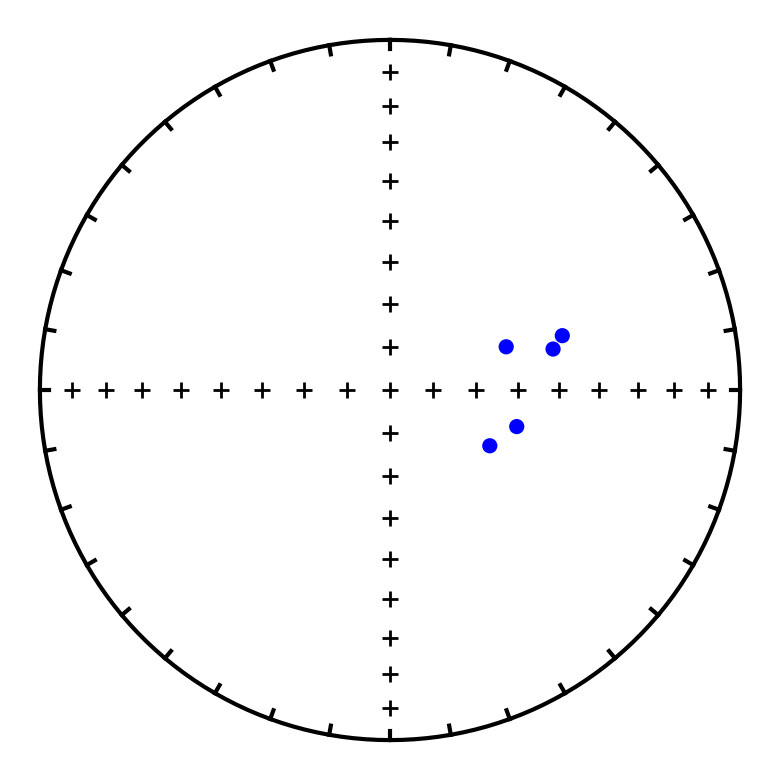

In [36]:
plt.figure(figsize=(4,4))
ipmag.plot_net()
ipmag.plot_di(SJ1_specimen_data['dir_dec'], SJ1_specimen_data['dir_inc'], color='blue', label='SJ1')

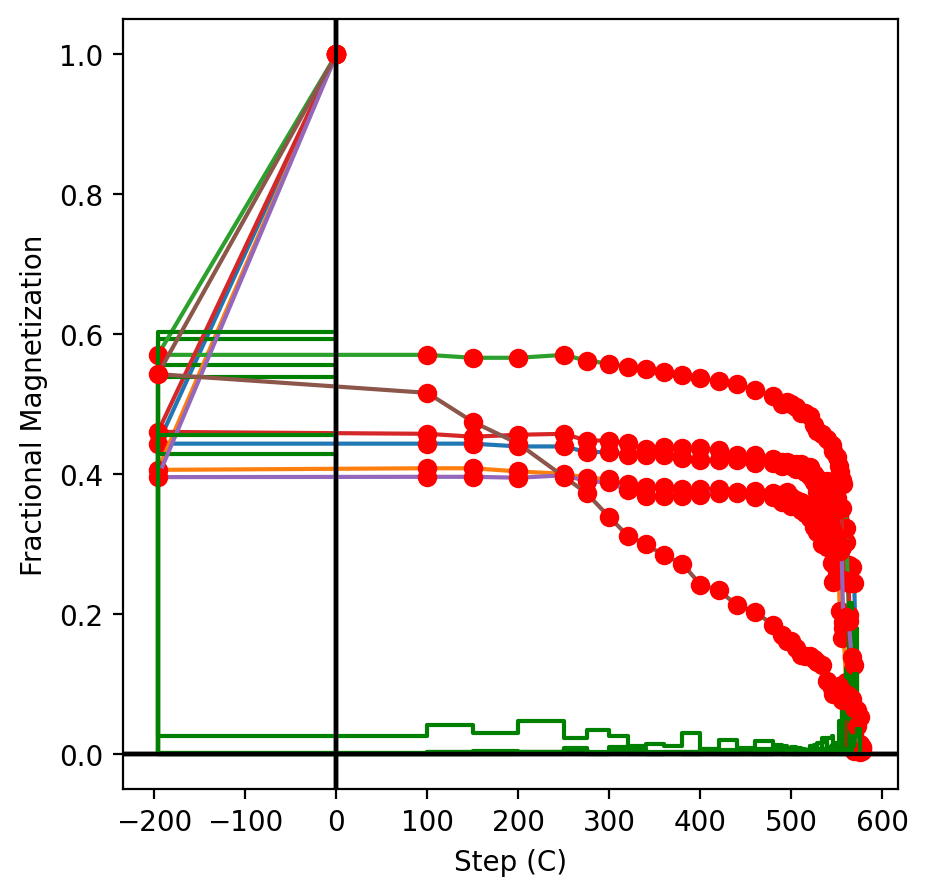

In [33]:
ipmag.plot_dmag(SJ1_measurement_data, dmag_key='treat_temp')

#### SJ5

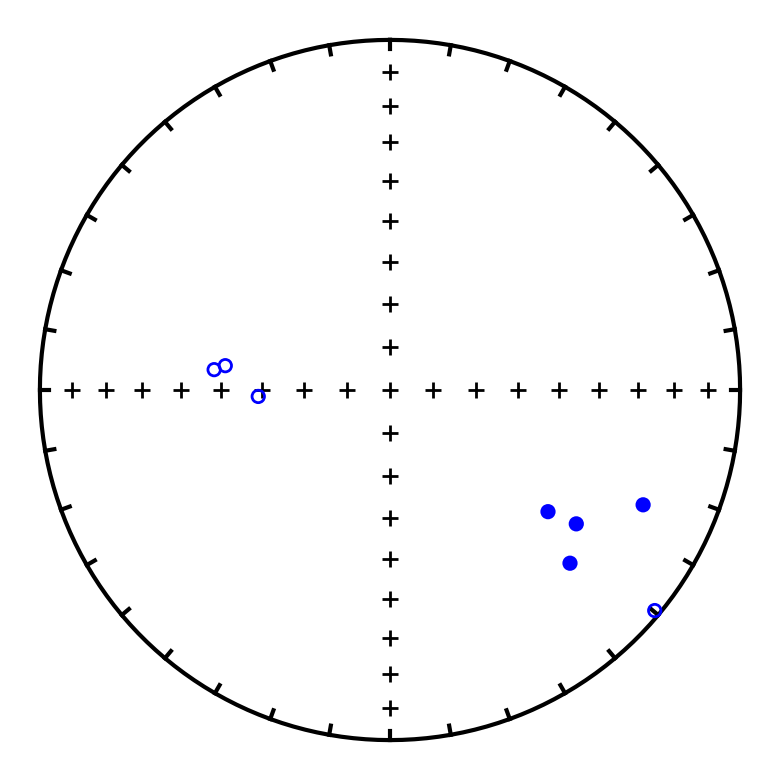

In [38]:
plt.figure(figsize=(4,4))
ipmag.plot_net()
ipmag.plot_di(SJ5_specimen_data['dir_dec'], SJ5_specimen_data['dir_inc'], color='blue', label='SJ5')

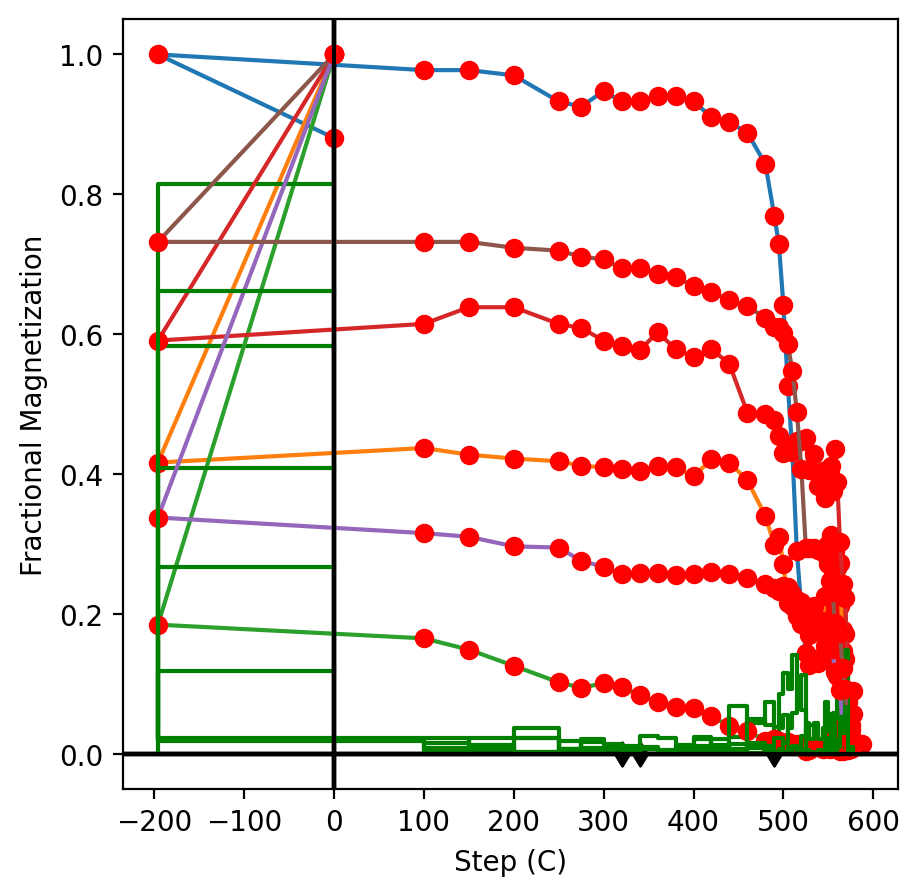

In [39]:
ipmag.plot_dmag(SJ5_measurement_data, dmag_key='treat_temp')

### Marcy Massif anorthosite complex of the Adirondack Highlands
- The Adirondack mountains in upstate New York are part of the Grenville orogen
- They are divided into the Adirondack Highlands and the Lowlands, with high and low indicating the condition of metamorphism
- The highlands is dominated by granulite-facies metamorphosed igneous rocks including the suite of anorthosite and associated man- gerite, charnockite and granite rocks (AMCG)
- The Marcy Massif is a complex intrusion with coarse anorthosite and leuconorite grading to more mafic compositions near the borders. Rocks in the center of the massif generally consist of coarse blue-gray plagioclase in a matrix with lighter plagioclase, clinopyroxene, orthopyroxene and minor opaques, hornblende and garnet
- A previous paleomagnetic study by Brown and McEnrow, 2012 performed thermal demagnetization and determined that the rocks unblocks sharply close to the Curie temperature of magnetite. They also reported that the anorthosite rocks record dual polarity data. They paired such data with previous thermochronologic data from the area and qualitatively assigned the age at which the rocks acquired remanence.

- However, the measurement level data was not published and the mineralogy that carry the normal vs. reversed polarity records was not discussed. In this project, we will first look at detailed thermal demag data developed by Yiming and investigate the mineralogy of the rocks in light of their polarity properties. 

- **suggested reading: Paleomagnetism and magnetic mineralogy of Grenville metamorphic and igneous rocks, Adirondack Highlands, USA. DOI: https://doi.org/10.1016/j.precamres.2012.04.012**

### Marcy Massif thermochronology
<img src="Marcy_thermal_history.png" alt="Marcy_thermal_history" width="800"/>

In [48]:
# load the site level thermal demag data
Adirondacks_Grenville_site_data = pd.read_csv('../data/pmag/Adirondacks/sites.txt', sep='\t', header=1)
# load the specimen level thermal demag data
Adirondacks_Grenville_specimen_data = pd.read_csv('../data/pmag/Adirondacks/specimens.txt', sep='\t', header=1)
# load the measurement level thermal demag data
Adirondacks_Grenville_measurement_data = pd.read_csv('../data/pmag/Adirondacks/measurements.txt', sep='\t', header=1)

# filter for data for sites MA1 and MA5
MA1_site_data = Adirondacks_Grenville_site_data[(Adirondacks_Grenville_site_data['site']=='MA1') & 
                                           (Adirondacks_Grenville_site_data['dir_tilt_correction']==0)].reset_index(drop=True)
MA5_site_data = Adirondacks_Grenville_site_data[(Adirondacks_Grenville_site_data['site']=='MA5') & 
                                           (Adirondacks_Grenville_site_data['dir_tilt_correction']==0)].reset_index(drop=True)

MA1_specimen_data = Adirondacks_Grenville_specimen_data[(Adirondacks_Grenville_specimen_data['site']=='MA1') & 
                                                        (Adirondacks_Grenville_specimen_data['dir_comp'] !='lt') &
                                                   (Adirondacks_Grenville_specimen_data['dir_tilt_correction']==0)].reset_index(drop=True)
MA5_specimen_data = Adirondacks_Grenville_specimen_data[(Adirondacks_Grenville_specimen_data['site']=='MA5') & 
                                                        (Adirondacks_Grenville_specimen_data['dir_comp'] !='lt') &
                                                   (Adirondacks_Grenville_specimen_data['dir_tilt_correction']==0)].reset_index(drop=True)

MA1_measurement_data = Adirondacks_Grenville_measurement_data[(Adirondacks_Grenville_measurement_data['site']=='MA1')].reset_index(drop=True)
MA5_measurement_data = Adirondacks_Grenville_measurement_data[(Adirondacks_Grenville_measurement_data['site']=='MA5')].reset_index(drop=True)

#### MA1

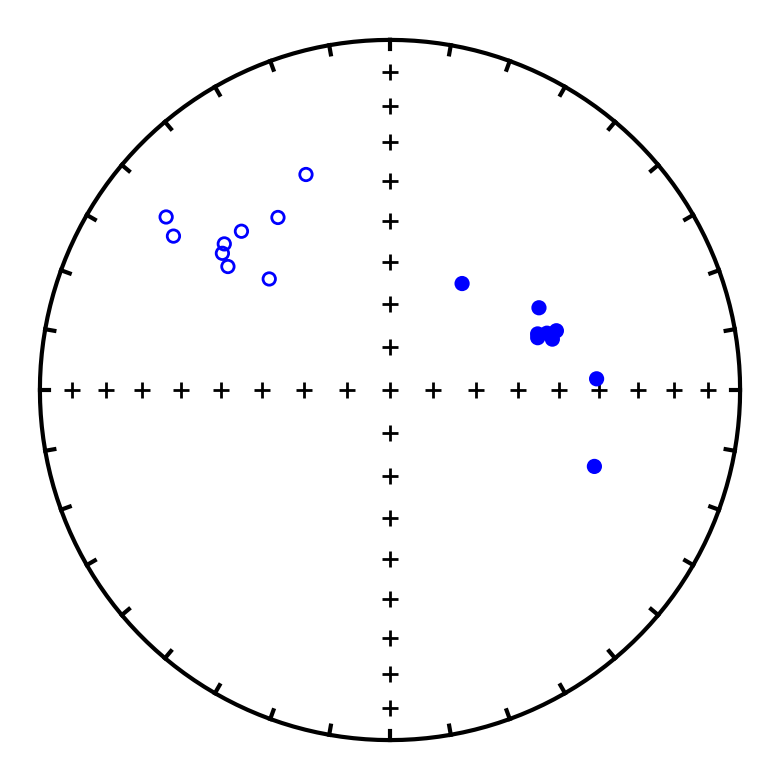

In [49]:
plt.figure(figsize=(4,4))
ipmag.plot_net()
ipmag.plot_di(MA1_specimen_data['dir_dec'], MA1_specimen_data['dir_inc'], color='blue', label='MA1')

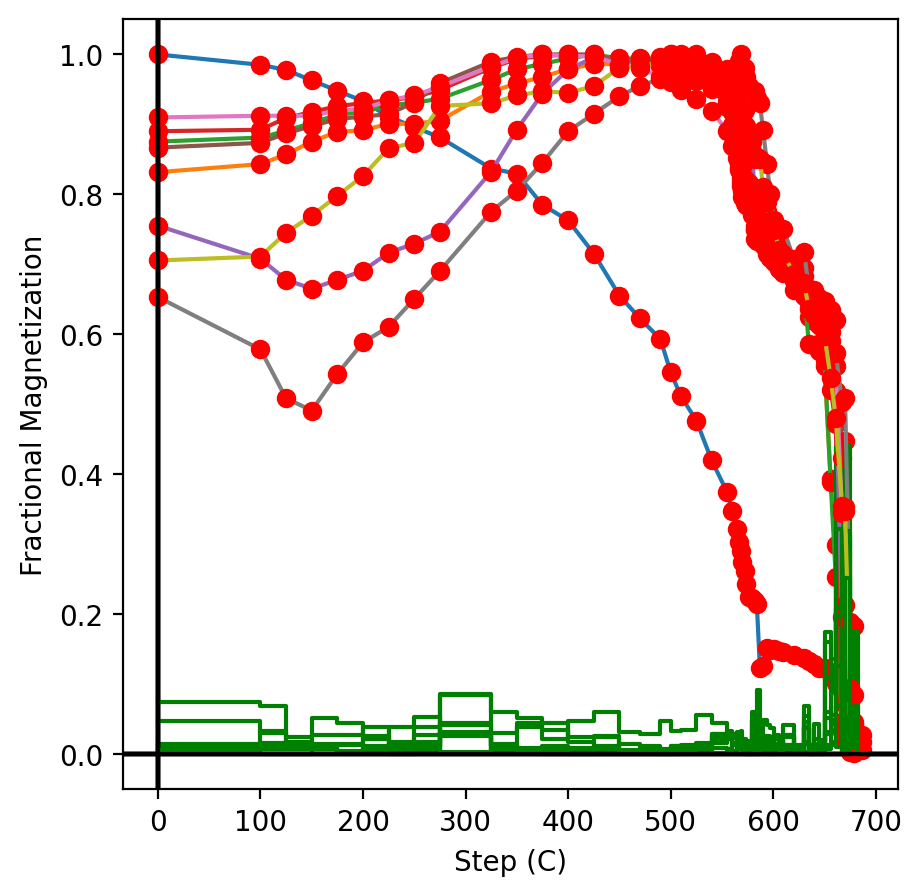

In [45]:
ipmag.plot_dmag(MA1_measurement_data, dmag_key='treat_temp')

#### MA5

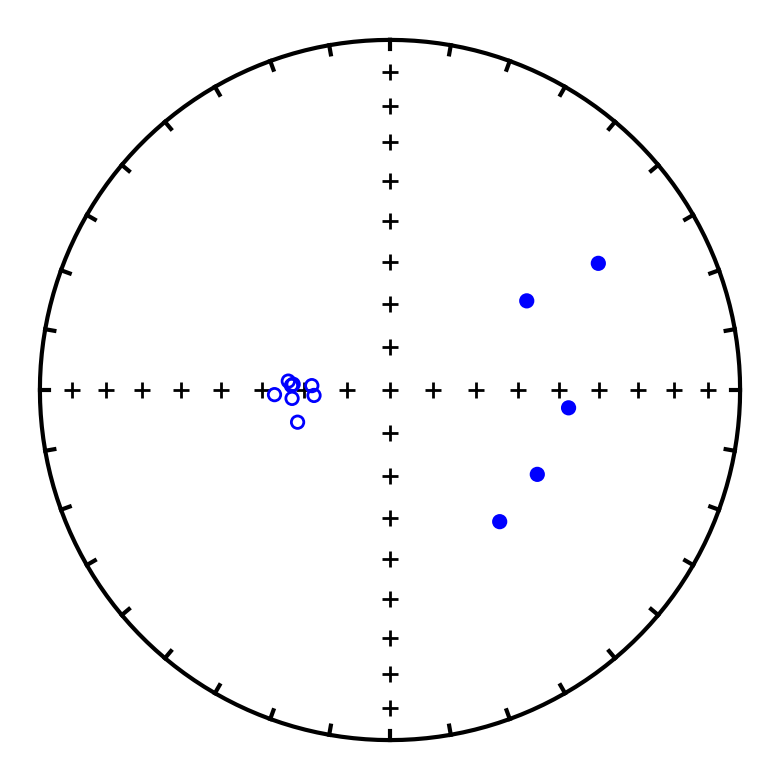

In [50]:
plt.figure(figsize=(4,4))
ipmag.plot_net()
ipmag.plot_di(MA5_specimen_data['dir_dec'], MA5_specimen_data['dir_inc'], color='blue', label='MA5')

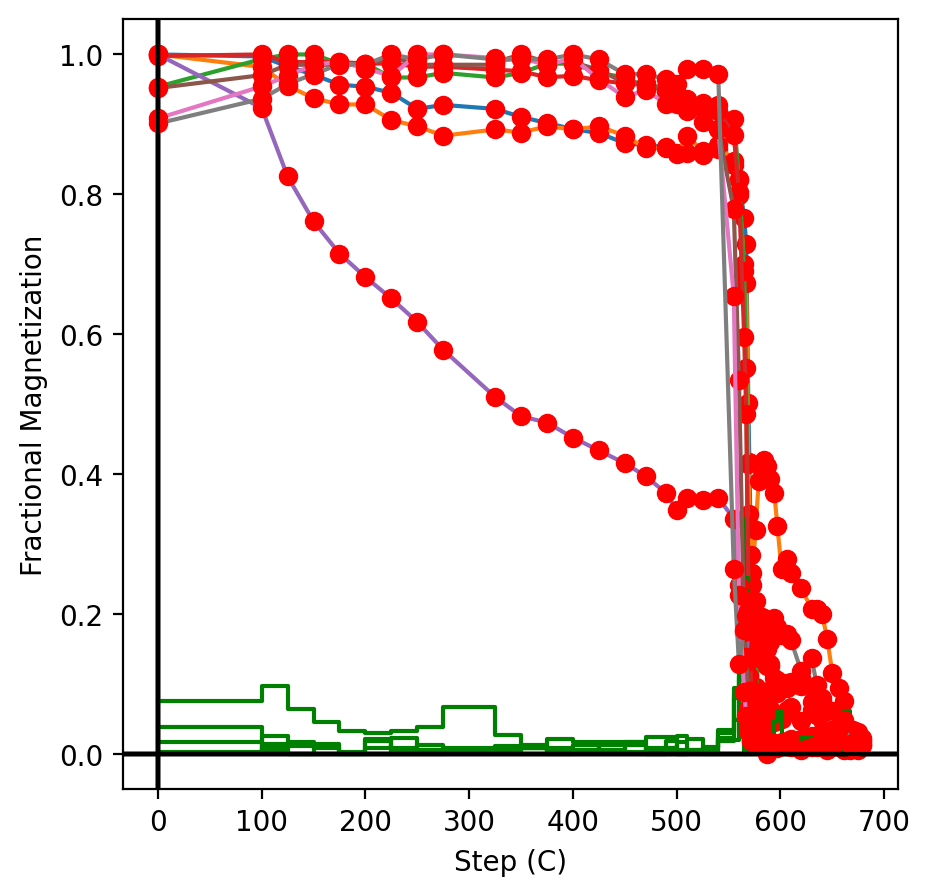

In [52]:
ipmag.plot_dmag(MA5_measurement_data, dmag_key='treat_temp')

### Haliburton Highlands
- There are a number of gabbroic/mafic intrusive bodies in the Haliburton area (Bancroft terrane) of Ontario
- Rocks of the region experienced primarily amphibolite facies metamorphism during the Grenville orogeny
- The gabbroic intrusions has been previously studied by Warnock et al., 2000
- They determined that there are pyrrhotite and magnetite in the rocks
- They also showed sharp unblocking temperature of the remanence near the Curie temperature of magnetite
- based on U-Pb titanite, Ar hornblende and biotite thermochronology data, they suggested that the magnetite-carrying remanence was acquired ca. 1015 Ma. 

**- suggested readings: Using thermochronometry and low-temperature demagnetization to accurately date Precambrian paleomagnetic poles. DOI: https://doi.org/10.1029/2000jb900114**

**Calibration of Grenvillian palaeopoles by 40Ar/39Ar dating. DOI: https://doi.org/10.1038/277046a0**

In [60]:
# filter for data for sites HH8 and HH12
HH8_measurement_data = Canada_Grenville_measurement_data[(Canada_Grenville_measurement_data['site']=='HH8')].reset_index(drop=True)
HH12_measurement_data = Canada_Grenville_measurement_data[(Canada_Grenville_measurement_data['site']=='HH12')].reset_index(drop=True)

#### HH8

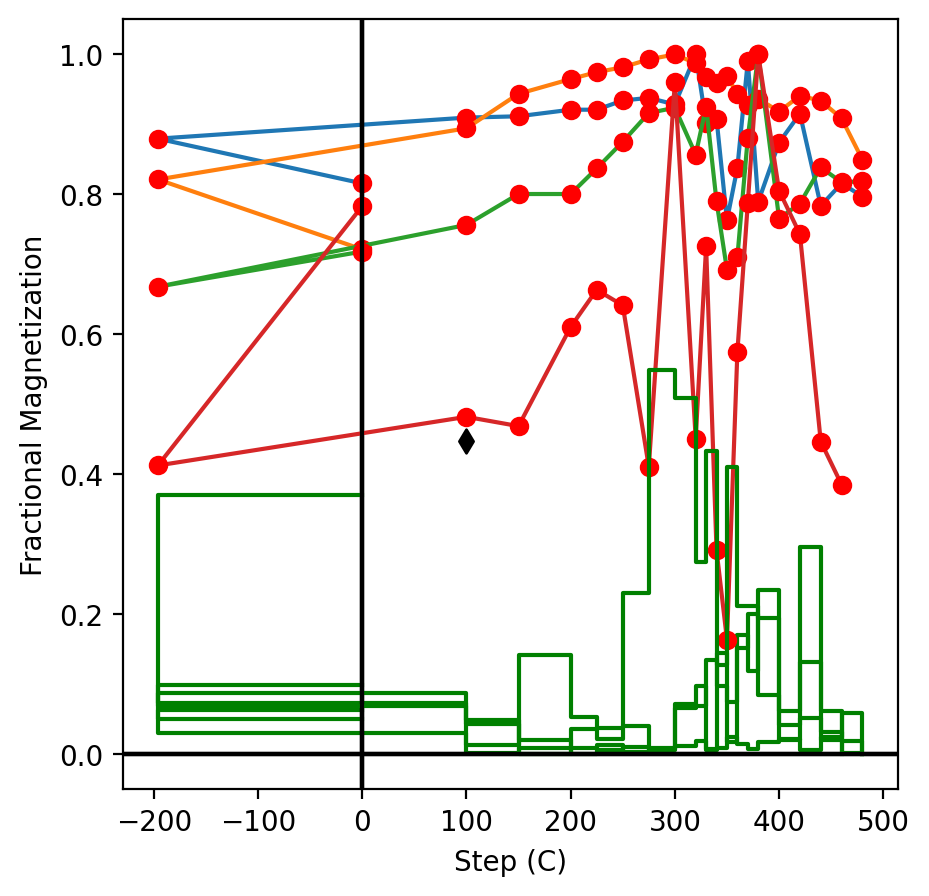

In [61]:
ipmag.plot_dmag(HH8_measurement_data, dmag_key='treat_temp')

#### HH12

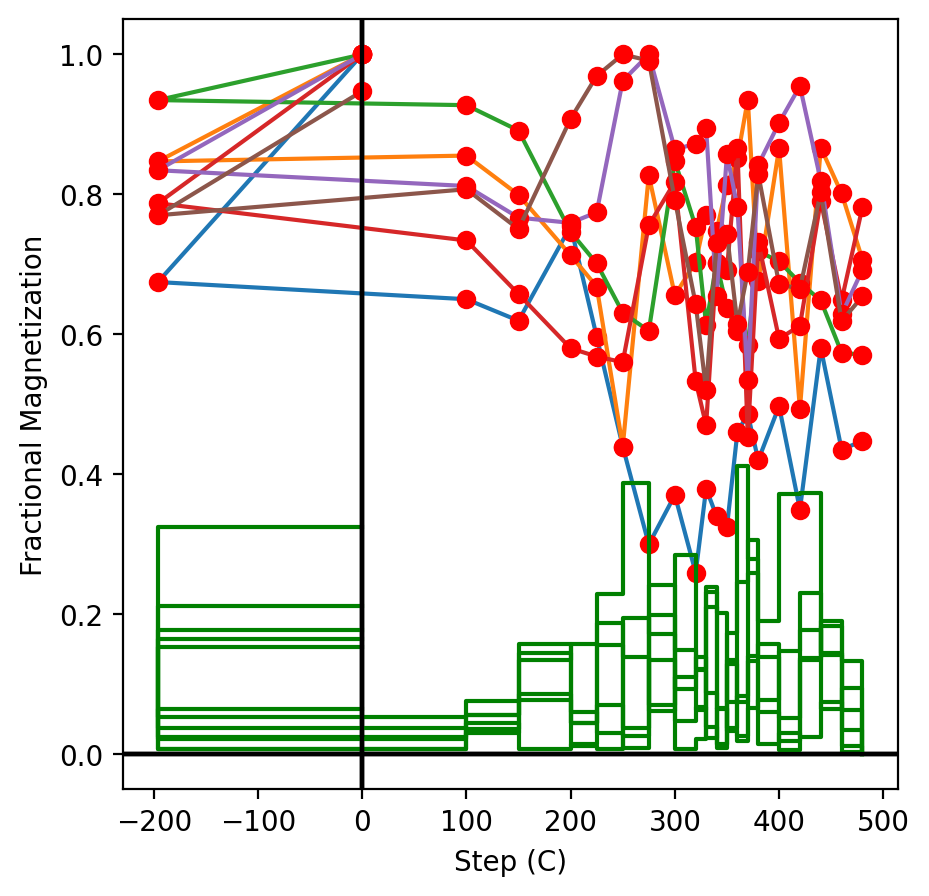

In [62]:
ipmag.plot_dmag(HH12_measurement_data, dmag_key='treat_temp')


## Additional samples to investigate if there is time

### Whitestone anorthosite
- intruded into gneiss and marbles of the Whitestone Lake Formation 
- magmatic zircon abundant and show ca. 1300 Ma ages
- titanite show no zoning and have ca. 1100 Ma ages
- previously studied 1975, when slow cooling correction theory was not available. Although authors recognized slow cooling issue, they erroneously assigned that the temperature for remanence acquisition is very low

#### Whitestone anorthosite
- **WS3-1** and **WS3-2** have very different mineralogy from thermal demag data. They are from the outer edge of the intrusion which might be more prone to fluid-associated alteration
- it looks like 1a is dominated by pyrrhotite remanence while 2a is dominated by stoichiometric magnetite
- let's use low temperature experiment and coercivity spectra to explore their magnetic mineralogy difference
- specimens of **WS9** hint that there are two distinct components carried by magnetite that unblock at slightly different temerpatures
- Let's see if we can distinguish them with rock mag methods. This site is from the inner part of the intrusion which may have igneous foliation
- we should explore anisotropy of remanence

#### Thanet Gabbro
- we can compare **TH1-1** and **TH1-5**
- 1a seems to have two magnetite components, 5a seems to have dominant pyrrhotite component

#### Tudor Gabbro
- origin trending component unblock through a large temperature range
- overall direction is NW and up, resulting in a pole position north to SE Asia
- some samples show distinct high temp component unblokcing 575-580 and another component 500-560
- some samples have a dominant pyrrhotite component 
- compare **TU1-3** and **TU1-5** and **TU1-6**